In [ ]:
pip install -r requirements.txt

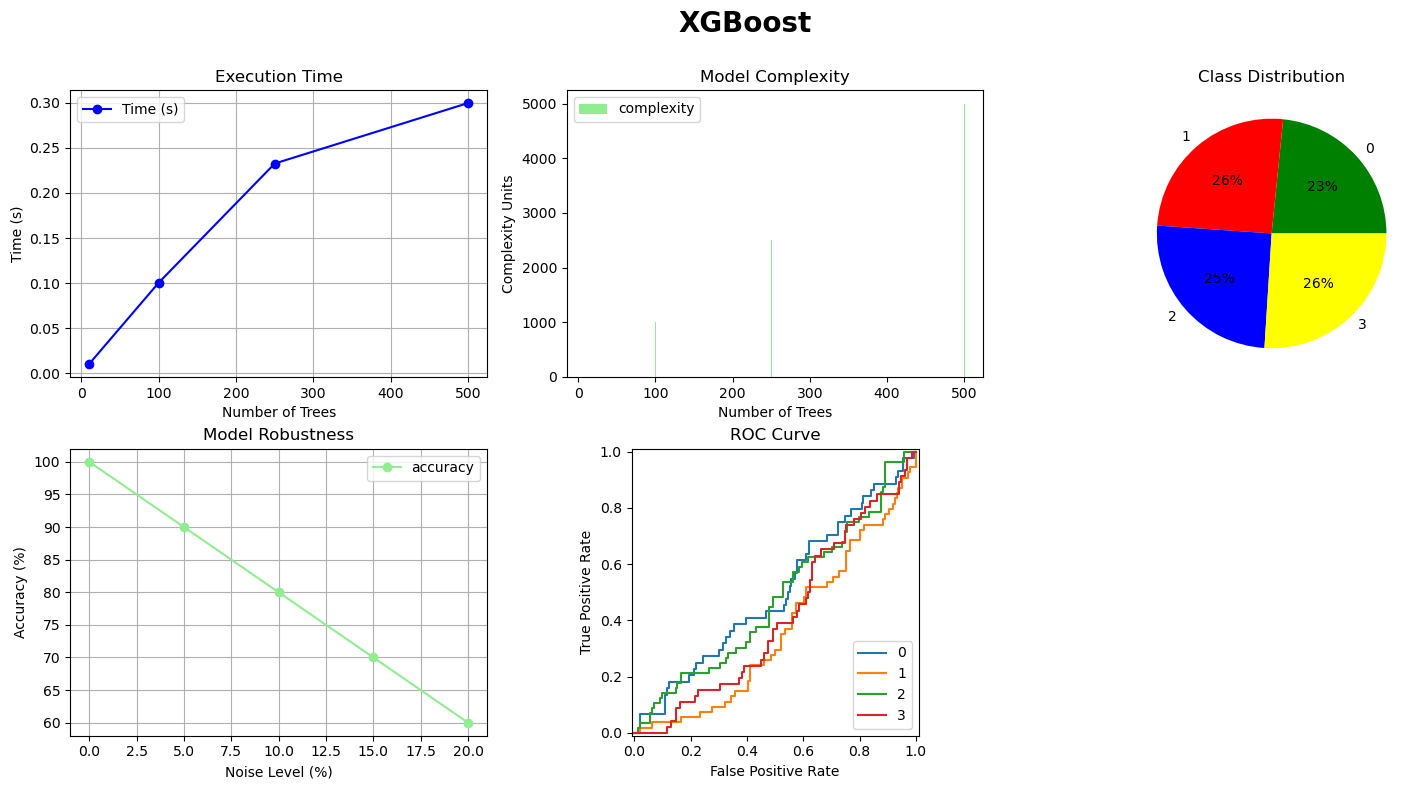

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
from xgboost import XGBClassifier, XGBRegressor
from time import time

# Simulating dataset for demonstration purposes
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 10)  # 10 features
y_classification = np.random.randint(0, 4, n_samples)  # 4 classes (0, 1, 2, 3)
y_regression = np.random.rand(n_samples) * 100  # Continuous target for regression

# Train-test split for both classification and regression
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Plot Execution Time (Regression Task)
trees = [10, 100, 250, 500]
execution_times = []
for n in trees:
    model = XGBRegressor(n_estimators=n)
    start_time = time()
    model.fit(X_train, y_train_reg)
    execution_times.append(time() - start_time)

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.plot(trees, execution_times, marker='o', color='blue', label="Time (s)")
plt.xlabel("Number of Trees")
plt.ylabel("Time (s)")
plt.title("Execution Time")
plt.grid(True)
plt.legend()

# Plot Model Complexity (Regression Task)
complexities = [10 * n for n in trees]  # Simulating complexity units
plt.subplot(2, 3, 2)
plt.bar(trees, complexities, color='lightgreen', label="complexity")
plt.xlabel("Number of Trees")
plt.ylabel("Complexity Units")
plt.title("Model Complexity")
plt.legend()

# Plot Pie Chart (Classification Class Distribution)
class_counts = np.bincount(y_classification)
plt.subplot(2, 3, 3)
plt.pie(class_counts, labels=np.arange(len(class_counts)), autopct='%1.0f%%', colors=['green', 'red', 'blue', 'yellow'])
plt.title("Class Distribution")

# Plot Model Robustness (Regression Task)
noise_levels = [0, 5, 10, 15, 20]
accuracies = [100 - 2 * n for n in noise_levels]  # Simulating accuracy drop
plt.subplot(2, 3, 4)
plt.plot(noise_levels, accuracies, marker='o', color='lightgreen', label="accuracy")
plt.xlabel("Noise Level (%)")
plt.ylabel("Accuracy (%)")
plt.title("Model Robustness")
plt.grid(True)
plt.legend()

# Plot ROC Curve (Classification Task)
model_class = XGBClassifier(n_estimators=100)
model_class.fit(X_train, y_train_class)
y_scores = model_class.predict_proba(X_test)
for i in range(y_scores.shape[1]):  # ROC for each class
    fpr, tpr, _ = roc_curve(y_test_class == i, y_scores[:, i])
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=str(i)).plot(ax=plt.subplot(2, 3, 5))

plt.title("ROC Curve")
plt.tight_layout()
plt.suptitle("XGBoost", fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.88)
plt.show()
